https://www.kaggle.com/code/parulpandey/part1-visualizing-kannada-mnist-with-pca?scriptVersionId=29322090

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
train = pd.read_csv(r"C:\Birla\Sem_2\TCS\ML\IA-2\Kanada_Datasets\train.csv")
test = pd.read_csv(r"C:\Birla\Sem_2\TCS\ML\IA-2\Kanada_Datasets\test.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
## Setting the label and the feature columns
y = train.loc[:,'label'].values
x = train.loc[:,'pixel0':].values

In [6]:
## Standardizing the data
standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)

(60000, 784)


In [7]:
## Importing and Apply PCA

pca = PCA(n_components=2) # project from 784 to 2 dimensions
principalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principal_df.shape

(60000, 2)

In [8]:
# Explaining the Variance ratio
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.07972071 0.05570993]


Text(0, 0.5, 'Principal Component 2')

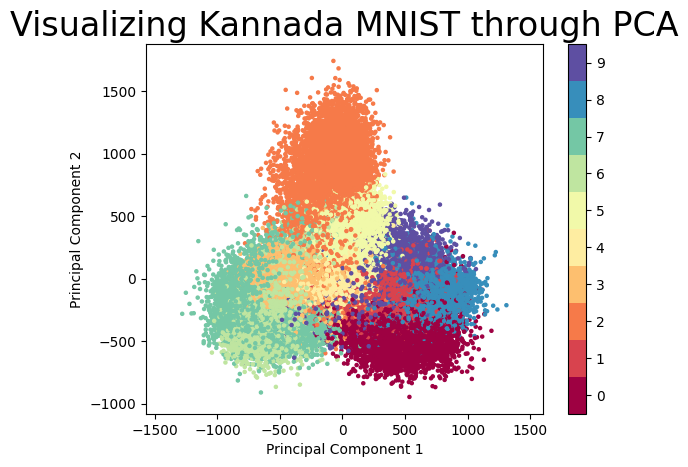

In [9]:
# Plot the first two principal components of each point to learn about the data:

plt.scatter(principalComponents[:, 0], principalComponents[:, 1], s= 5, c=y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through PCA', fontsize=24)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [10]:
## Using 3 Principal Components

pca = PCA(n_components=3) # project from 784 to 2 dimensions
principalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principal_df.shape

(60000, 3)

In [11]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.07972071 0.05570993 0.04466606]


In [12]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(x)

Text(0, 0.5, 'cumulative explained variance')

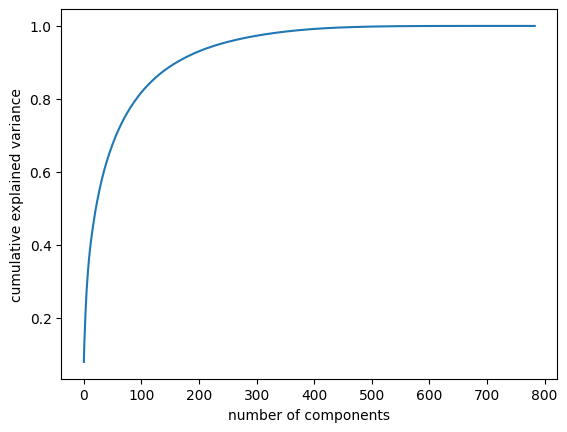

In [13]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

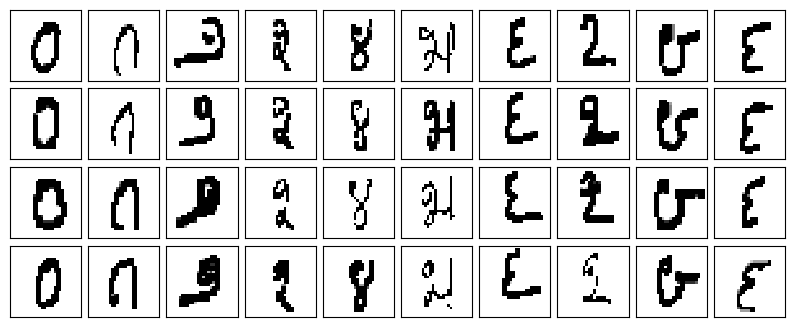

In [14]:
## Plotting the original train data without noise

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(x)

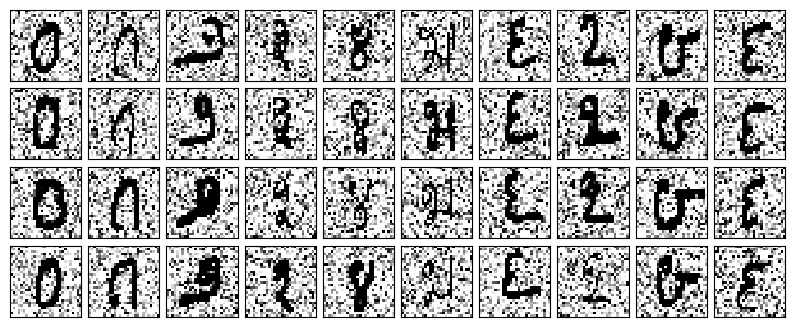

In [15]:
## Introducing some random noise

np.random.seed(42)
noisy = np.random.normal(x, 10)
plot_digits(noisy)

In [16]:
## Training a PCA on noisy data and letting the projection preserve 50% of the variance:

pca = PCA(0.50).fit(noisy)
pca.n_components_

24

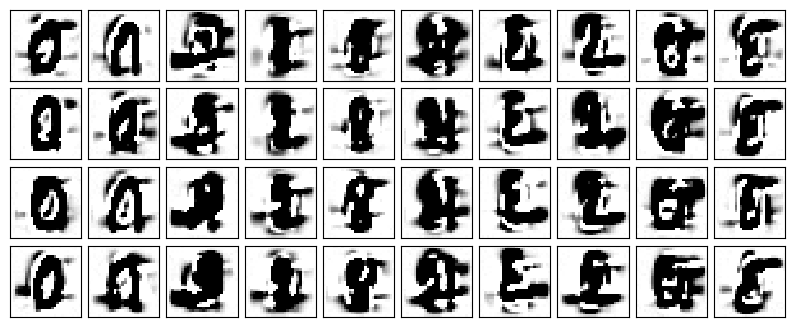

In [17]:
#using the inverse of the transform to reconstruct the filtered digits:

components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Drawbacks of PCA

The main drawback of PCA is that it is highly influenced by outliers in the data. There are a couple of variants in Scikit-learn like RandomizedPCA and SParsePCA. Have a look at documentation to know more.